
**Resources**
*   https://www.geeksforgeeks.org/what-is-sentiment-analysis/ (intro)
*   https://www.nltk.org/api/nltk.tokenize.html (tokenize - separate sentence into words)
*   https://youtu.be/9p1KYtYAus8 (vader lexicon tutorial - for sentiment analysis)
*   dataset (#56 from https://www.nltk.org/nltk_data/)
*   dataset downloaded from https://www.kaggle.com/datasets/mdwaquarazam/headphone-dataset-review-analysis

<br>


<br>
Documents (bg study, methods etc will do later)

> Step 1: Count vectorizer (frequency each words appeared), then identify similarity (use cosine similarity equation, correlation etc.)

> Step 2: Tokenize, Pre-process comments, then do sentiment analysis

> Step 3: each of us will choose our preferred method (bayes, knn, k-means)

> Step 4: compare the results (from using different methods)

*lastly, complete our documents then submit :)







In [1]:
%pip install nltk
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
# enter: pip install nltk  (when using python)

import nltk
import pandas as pd    # to allow us to read csv file
import random
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import subprocess
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [8]:
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

True

In [9]:
data = pd.read_csv('headphone_datn.csv')

In [5]:
# data.head()
total = data.count()
print(total)

Customer_Name    1604
REVIEW_TITLE     1594
Color            1604
REVIEW_DATE      1604
COMMENTS         1546
RATINGS          1604
dtype: int64


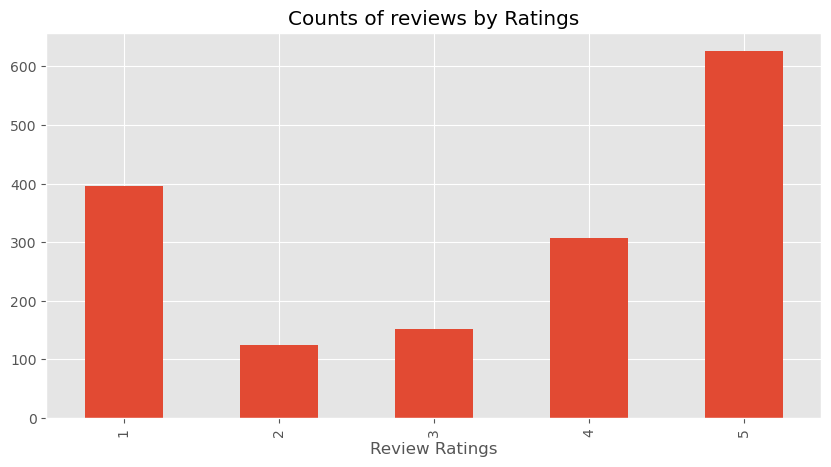

In [12]:
#to indicate how many rating is occupied
ax = data['RATINGS'].value_counts().sort_index().plot(kind='bar', title= 'Counts of reviews by Ratings', figsize=(10, 5))
ax.set_xlabel('Review Ratings')
plt.show()

In [6]:
# create pre processing function

def preprocess_text(text):
  # remove punctuations
  data['COMMENTS'].dropna(inplace=True)
  data['COMMENTS'] = data['COMMENTS'].astype(str)

  tokens = nltk.word_tokenize(text)
  # return [w for w in tokens if w.isalpha()]   
  # tokens = nltk.word_tokenize(df['COMMENTS'])

  # remove stop words
  filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

  # lemmatize the tokens
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

  #Join the tokens back into a string
  processed_text = ' '.join(lemmatized_tokens)
  return processed_text


data['tokenized'] = data.apply(lambda x: preprocess_text(x['COMMENTS']), axis=1) 
print(data['tokenized'])


TypeError: expected string or bytes-like object, got 'float'

In [ ]:
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment

# apply get_sentiment function

data['sentiment'] = data['COMMENTS'].apply(get_sentiment)

data